# Multiple Linear Regression
## Bike Sharing Case Study

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in its revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits

Goal:


- To identify variables which are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands



## Step 1: Reading and Understanding the Data

Let us first import all the required  libraries and read the bike dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Loading

In [3]:
# Read the dataset
bike=pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Inspection

In [5]:
# Check the shape of dataset
bike.shape

(730, 16)

In [6]:
# Check the complete infomation of dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Standardization

- Standardize the season variable

In [8]:
# Check the categories in season variable
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
# Update the season variable with respective season
bike.season=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

- Standardize the mnth variable

In [10]:
# Check the categories in mnth variable
bike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [11]:
# Update mnth variable with respective month
bike.mnth=bike.mnth.map({ 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

- Standardize the weathersit variable

`Note: ` In provided documentation, there are 4 weather mention but dataset contain only 3 weathers

In [12]:
# Check the categories in weathersit variable
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
# Update weathersit variable with respective standard value
bike.weathersit=bike.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow'})

- Standardize the weekday variable

In [14]:
# Check the categories in weekday variable
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [15]:
# Update weekdays variable with standard values
bike.weekday=bike.weekday.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday',
                  4:'Thursday', 5:'Friday', 6:'Saturday'})

- Format dteday column values

In [16]:
# Format dteday column values
bike.dteday=bike.dteday.astype('datetime64')

In [17]:
# Cross check after format
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

## Step 3: Visualising the Data

- ### Visualize the categorical variables

In [18]:
# List out the categorical varible
bike.iloc[:,2:9].columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

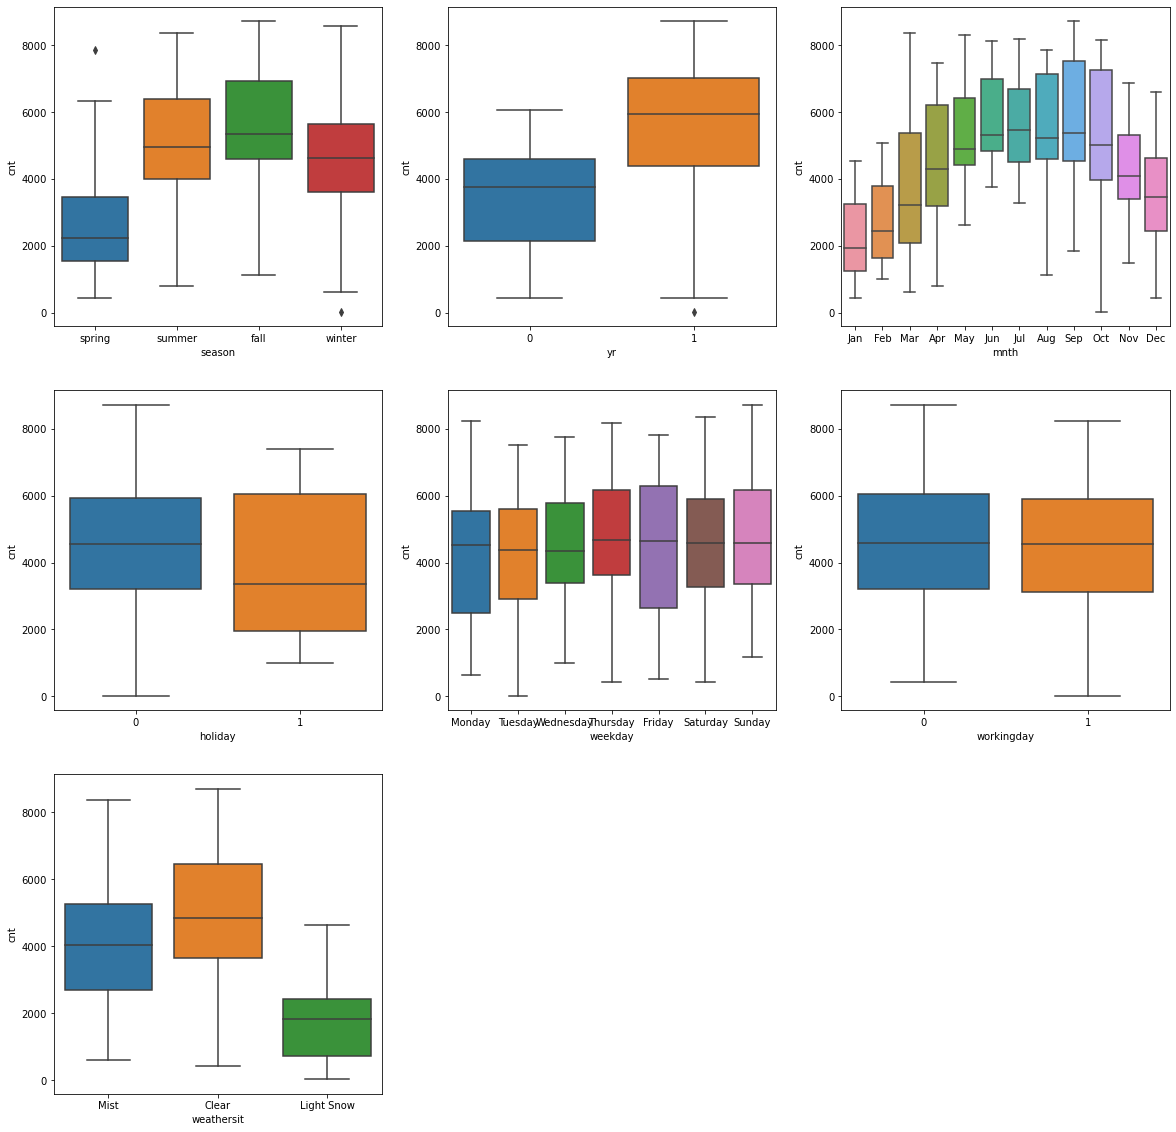

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(332)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(333)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(334)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(335)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(336)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.subplot(337)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.show()

- ### Visualize the Numerical variables

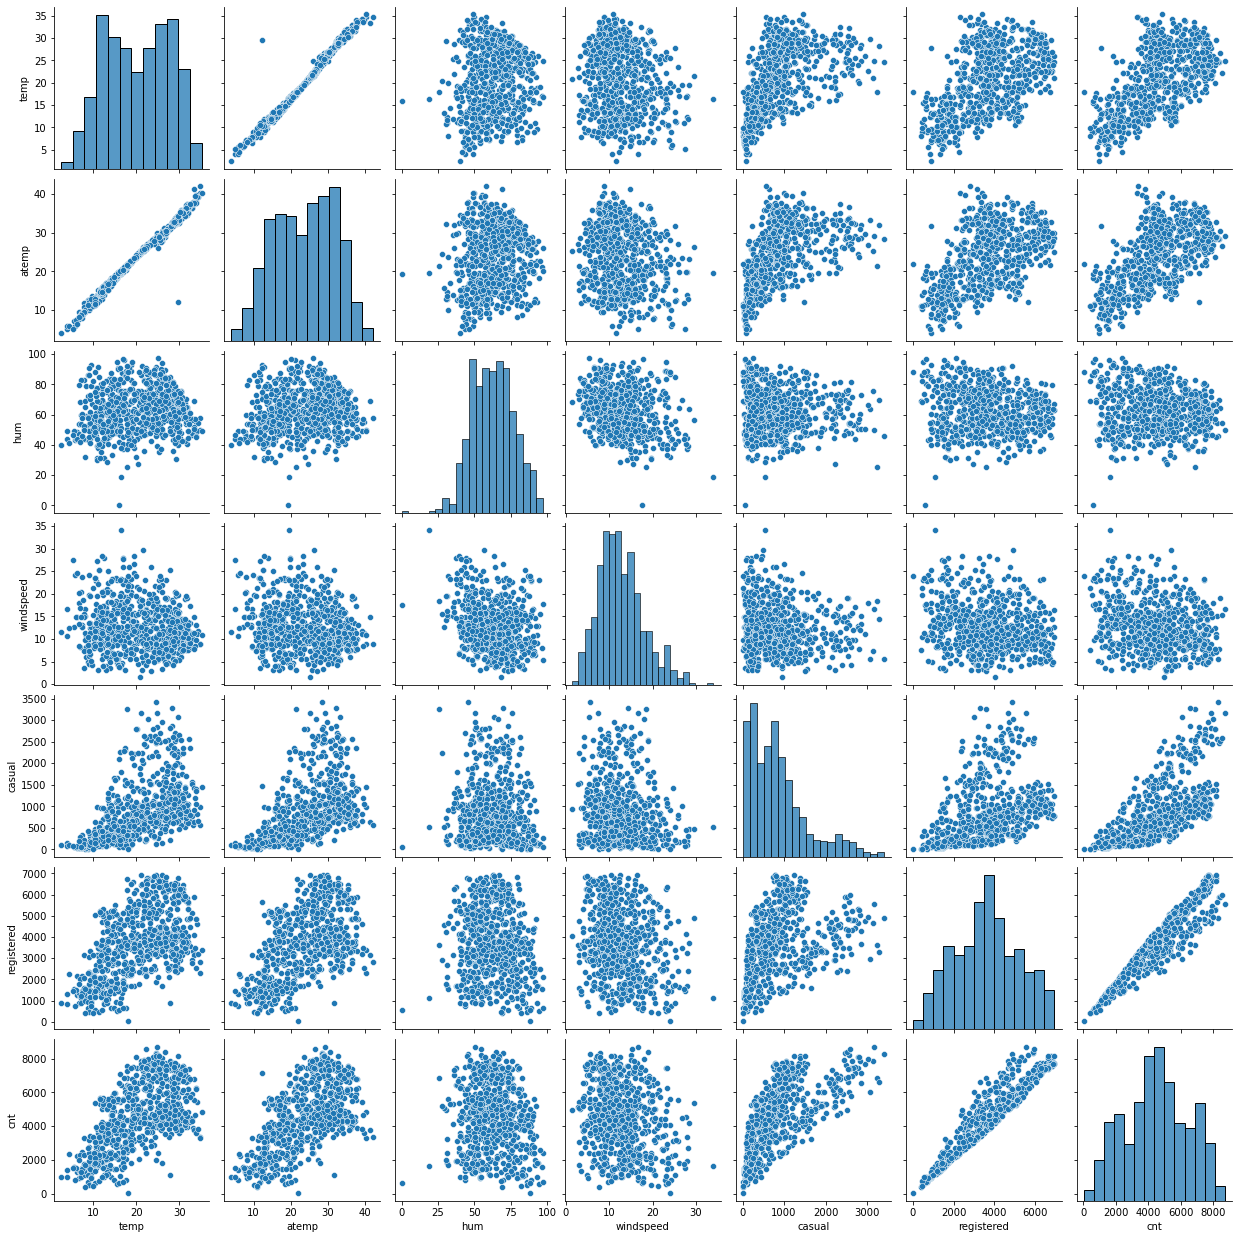

In [20]:
# Visualize the Numerical Variable
sns.pairplot(bike.iloc[:,9:])
plt.show()

In [21]:
corr=bike.iloc[:,9:].corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


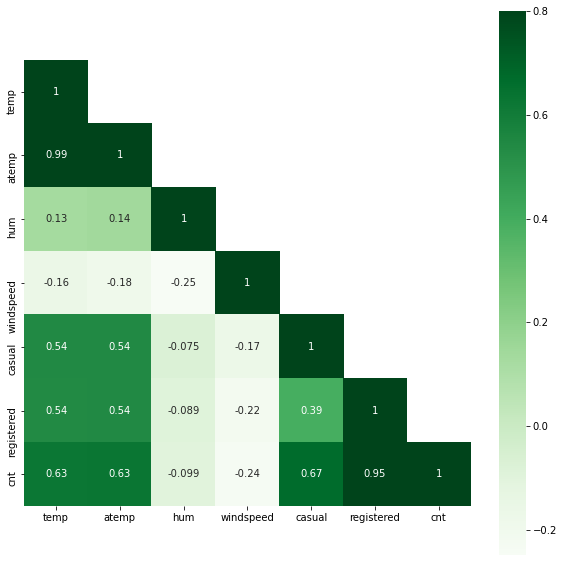

In [22]:
# Visuallize the correlation
mask = np.array(corr)
mask[ np.tril_indices_from(mask) ] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, mask=mask, vmax=0.8, square=True, annot=True,cmap='Greens');

In [23]:
# Drop the instant and dteday columns due to relevance
bike.drop(['instant','dteday'],axis=1,inplace=True)

In [24]:
# Drop the casual and registered  columns due to multi collinearity
bike.drop(['casual','registered'],axis=1,inplace=True)

In [25]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [26]:
# Create the dummy variables
dummy_data=pd.get_dummies(bike[['season','mnth','weekday','weathersit']],drop_first=True)

In [27]:
dummy_data.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Concat the dummy variable with bike dataset
bike = pd.concat([bike, dummy_data], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,spring,0,Jan,0,Monday,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Drop the features for which dummies have added
bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [30]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [31]:
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
print("Train dataset Shape:: {}".format(bike_train.shape))
print("Test dataset Shape:: {}".format(bike_test.shape))

Train dataset Shape:: (510, 30)
Test dataset Shape:: (219, 30)


### Rescaling the Features 


In [33]:
# Rescale the temp, atemp, hum and windspeed features
scaler = MinMaxScaler()
scale_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']

bike_train[scale_vars]=scaler.fit_transform(bike_train[scale_vars])

In [34]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


## Step 5: Building a linear model

In [35]:
# Define the function for model building
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return lm , X

# Define the function for checking VIF
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [36]:
# Build first model with all the features
bike_train_y=bike_train.cnt
bike_train_X=bike_train.loc[:, bike_train.columns != 'cnt']

lm_1, bike_train_X_new_1=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.09e-178
Time:                        21:45:37   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

In [37]:
# Drop the 'mnth_Mar' as it is insignificant
bike_train.drop(['mnth_Mar'],axis=1,inplace=True)

# Build the Model again
bike_train_y=bike_train.cnt
bike_train_X=bike_train.loc[:, bike_train.columns != 'cnt']

lm_2, bike_train_X_new_2=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.06
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.10e-179
Time:                        21:45:37   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     481   BIC:                            -866.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

In [38]:
# Drop the 'mnth_Jun' as it is insignificant
bike_train.drop(['mnth_Jun'],axis=1,inplace=True)

# Build the Model again
bike_train_y=bike_train.cnt
bike_train_X=bike_train.loc[:, bike_train.columns != 'cnt']

lm_3, bike_train_X_new_3=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.03e-180
Time:                        21:45:37   Log-Likelihood:                 523.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

In [39]:
# Drop the 'mnth_Oct' as it is insignificant
bike_train.drop(['mnth_Oct'],axis=1,inplace=True)

# Build the Model again
bike_train_y=bike_train.cnt
bike_train_X=bike_train.loc[:, bike_train.columns != 'cnt']

lm_4, bike_train_X_new_4=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.92e-181
Time:                        21:45:37   Log-Likelihood:                 523.85
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     483   BIC:                            -879.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

In [40]:
# Drop the 'weekday_Thursday' as it is insignificant
bike_train.drop(['weekday_Thursday'],axis=1,inplace=True)

# Build the Model again
bike_train_y=bike_train.cnt
bike_train_X=bike_train.loc[:, bike_train.columns != 'cnt']

lm_5, bike_train_X_new_5=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.81e-182
Time:                        21:45:37   Log-Likelihood:                 523.82
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.39

## Apply RFE

In [41]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(bike_train_X_new_5, bike_train_y)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(bike_train_X_new_5, bike_train_y)

In [42]:
list(zip(bike_train_X_new_5.columns,rfe.support_,rfe.ranking_))

[('const', False, 7),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 5),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 4),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Tuesday', False, 3),
 ('weekday_Wednesday', False, 6),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [43]:
col = list(bike_train_X_new_5.columns[rfe.support_])
col

['yr',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Nov',
 'mnth_Sep',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Light Snow',
 'weathersit_Mist']

In [44]:
bike_train_X_new_5.columns[~rfe.support_]

Index(['const', 'mnth_Aug', 'mnth_May', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [45]:
# Build the Model on the 20 features which are got from RFE
bike_train_y=bike_train.cnt
bike_train_X=bike_train[col]

lm_6, bike_train_X_new_6=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.51e-185
Time:                        21:45:37   Log-Likelihood:                 518.74
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     489   BIC:                            -906.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.38

In [46]:
# Calculate the VIFs for the new model
bike_train_X_new_6.drop(['const'],axis=1,inplace=True)
checkVIF(bike_train_X_new_6)

,Features,VIF
3,temp,394.20
4,atemp,371.87
2,workingday,47.36
5,hum,38.35
17,weekday_Sunday,9.52
16,weekday_Saturday,9.17
7,season_spring,7.15
6,windspeed,5.67
9,season_winter,5.07
8,season_summer,3.66


In [47]:
# Running RFE with the output number of the variable equal to 17
lm = LinearRegression()
lm.fit(bike_train_X_new_6, bike_train_y)

rfe = RFE(lm, 17)             # running RFE
rfe = rfe.fit(bike_train_X_new_6, bike_train_y)

In [48]:
list(zip(bike_train_X_new_6.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 3),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [49]:
col = list(bike_train_X_new_6.columns[rfe.support_])
col

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Nov',
 'mnth_Sep',
 'weathersit_Light Snow',
 'weathersit_Mist']

In [50]:
bike_train_X_new_6.columns[~rfe.support_]

Index(['atemp', 'weekday_Saturday', 'weekday_Sunday'], dtype='object')

In [51]:
# Build the Model on the 17 features which are got from RFE
bike_train_y=bike_train.cnt
bike_train_X=bike_train[col]

lm_7, bike_train_X_new_7=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.60e-188
Time:                        21:45:38   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [52]:
# Calculate the VIFs for the new model
bike_train_X_new_7.drop(['const'],axis=1,inplace=True)
checkVIF(bike_train_X_new_7)

,Features,VIF
4,hum,32.48
3,temp,18.49
6,season_spring,5.48
5,windspeed,4.76
8,season_winter,4.10
2,workingday,3.70
7,season_summer,2.84
11,mnth_Jan,2.38
16,weathersit_Mist,2.37
0,yr,2.09


In [53]:
# Remove the 'mnth_Feb' from 'col' list as it is insignificant 
col.remove('mnth_Feb')

# Build the Model again
bike_train_y=bike_train.cnt
bike_train_X=bike_train[col]

lm_8, bike_train_X_new_8=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.55e-189
Time:                        21:45:38   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [54]:
# Calculate the VIFs for the new model
bike_train_X_new_8.drop(['const'],axis=1,inplace=True)
checkVIF(bike_train_X_new_8)


,Features,VIF
4,hum,31.92
3,temp,17.92
5,windspeed,4.75
6,season_spring,4.42
8,season_winter,4.10
2,workingday,3.69
7,season_summer,2.83
15,weathersit_Mist,2.37
0,yr,2.09
12,mnth_Nov,1.84


In [55]:
# Remove the 'hum' from 'col' list because of high VIF
col.remove('hum')

# Build the Model again
bike_train_y=bike_train.cnt
bike_train_X=bike_train[col]

lm_9, bike_train_X_new_9=build_model(bike_train_X,bike_train_y)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.13e-186
Time:                        21:45:38   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [56]:
# Calculate the VIFs for the new model
bike_train_X_new_9.drop(['const'],axis=1,inplace=True)
checkVIF(bike_train_X_new_9)

,Features,VIF
3,temp,6.11
4,windspeed,4.68
2,workingday,3.58
5,season_spring,3.08
7,season_winter,3.07
6,season_summer,2.31
0,yr,2.07
11,mnth_Nov,1.81
9,mnth_Jan,1.66
10,mnth_Jul,1.59


## Residual Analysis of the train data

Check if the error terms are normally distributed

In [57]:
bike_train_X_new_9=sm.add_constant(bike_train_X_new_9)
bike_train_y_pred = lm_9.predict(bike_train_X_new_9)

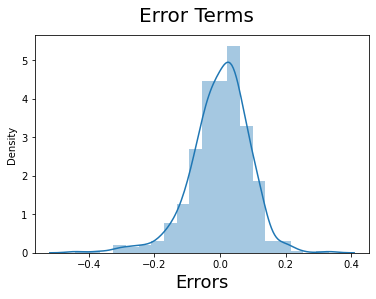

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((bike_train_y - bike_train_y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [59]:
scale_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[scale_vars]=scaler.transform(bike_test[scale_vars])

# Extract the Model Features
prediction_columns=bike_train_X_new_9.drop(['const'],axis=1).columns

In [60]:
# Now let's use our model to make predictions.
bike_test_X = bike_test[prediction_columns] # Use model features for test dataset prediction
bike_test_X = sm.add_constant(bike_test_X) # Add a constant

#Make Prediction
bike_test_y_pred = lm_9.predict(bike_test_X)
bike_test_y_pred

184    0.370770
535    0.878749
299    0.441298
221    0.572551
152    0.569491
         ...   
400    0.387588
702    0.701192
127    0.519840
640    0.799625
72     0.282373
Length: 219, dtype: float64

## Model Evaluation

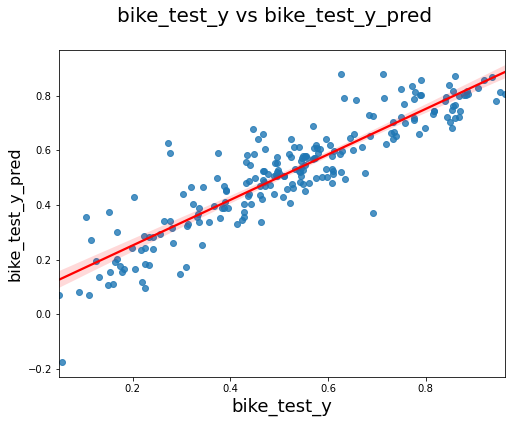

In [61]:
# Plotting actual vs predicted to understand the spread.
fig = plt.figure(figsize=(8,6))
sns.regplot(x=bike_test['cnt'],y=bike_test_y_pred,line_kws={"color":"r"})
fig.suptitle('bike_test_y vs bike_test_y_pred', fontsize=20)              # Plot heading 
plt.xlabel('bike_test_y', fontsize=18)                          # X-label
plt.ylabel('bike_test_y_pred', fontsize=16)
plt.show()

In [62]:
# Defind the function for finding R Squared and R Squared Adjusted
def  find_R_Squared_and_R_Squared_Adjusted(lm,X,y):
    y_pred = lm.predict(X)
    SS_Residual = sum((y-y_pred)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return r_squared,adjusted_r_squared

In [63]:
# Find the R Squared and R Squared Adjusted for train dataset

r_squared, adjusted_r_squared=find_R_Squared_and_R_Squared_Adjusted(lm_9,bike_train_X_new_9,bike_train_y)
print("Train dataset:\n R Squared: {} \n R Squared Adjusted: {}\n\n".format(r_squared, adjusted_r_squared))



# Find the R Squared and R Squared Adjusted for test dataset

bike_test_y=bike_test['cnt']
bike_test_X=sm.add_constant(bike_test[prediction_columns])

r_squared, adjusted_r_squared=find_R_Squared_and_R_Squared_Adjusted(lm_9,bike_test_X,bike_test_y)
print("Test dataset:\n R Squared: {} \n R Squared Adjusted: {}".format(r_squared, adjusted_r_squared))

Train dataset:
 R Squared: 0.8417855795904906 
 R Squared Adjusted: 0.8366508316664497


Test dataset:
 R Squared: 0.8160235878128291 
 R Squared Adjusted: 0.8014511987286967


`Conclusion: ` The  R square and R Square adjusted values on test dataset is very close to train dataset so we can say that what model has learned on training dataset, it is able generalized on test dataset